## PROBLEM
### Fitting a Logistic Regression Model and Directly Using the Coefficients


### Details of Logistic Regression and Feature Exploration

* Write list comprehensions in Python

* Describe the workings of logistic regression

* Formulate the sigmoid and logit versions of logistic regression

* Utilize univariate feature selection to find important features

* Customize plots with the Matplotlib API

* Characterize the linear decision boundary of a logistic regression


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 4

In [2]:
#importng the dataset
df=pd.read_csv('Data set/cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [3]:
features_response=['LIMIT_BAL','EDUCATION','MARRIAGE','AGE','PAY_1','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default payment next month']

### Pearson Correlation


In [4]:
corr = df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


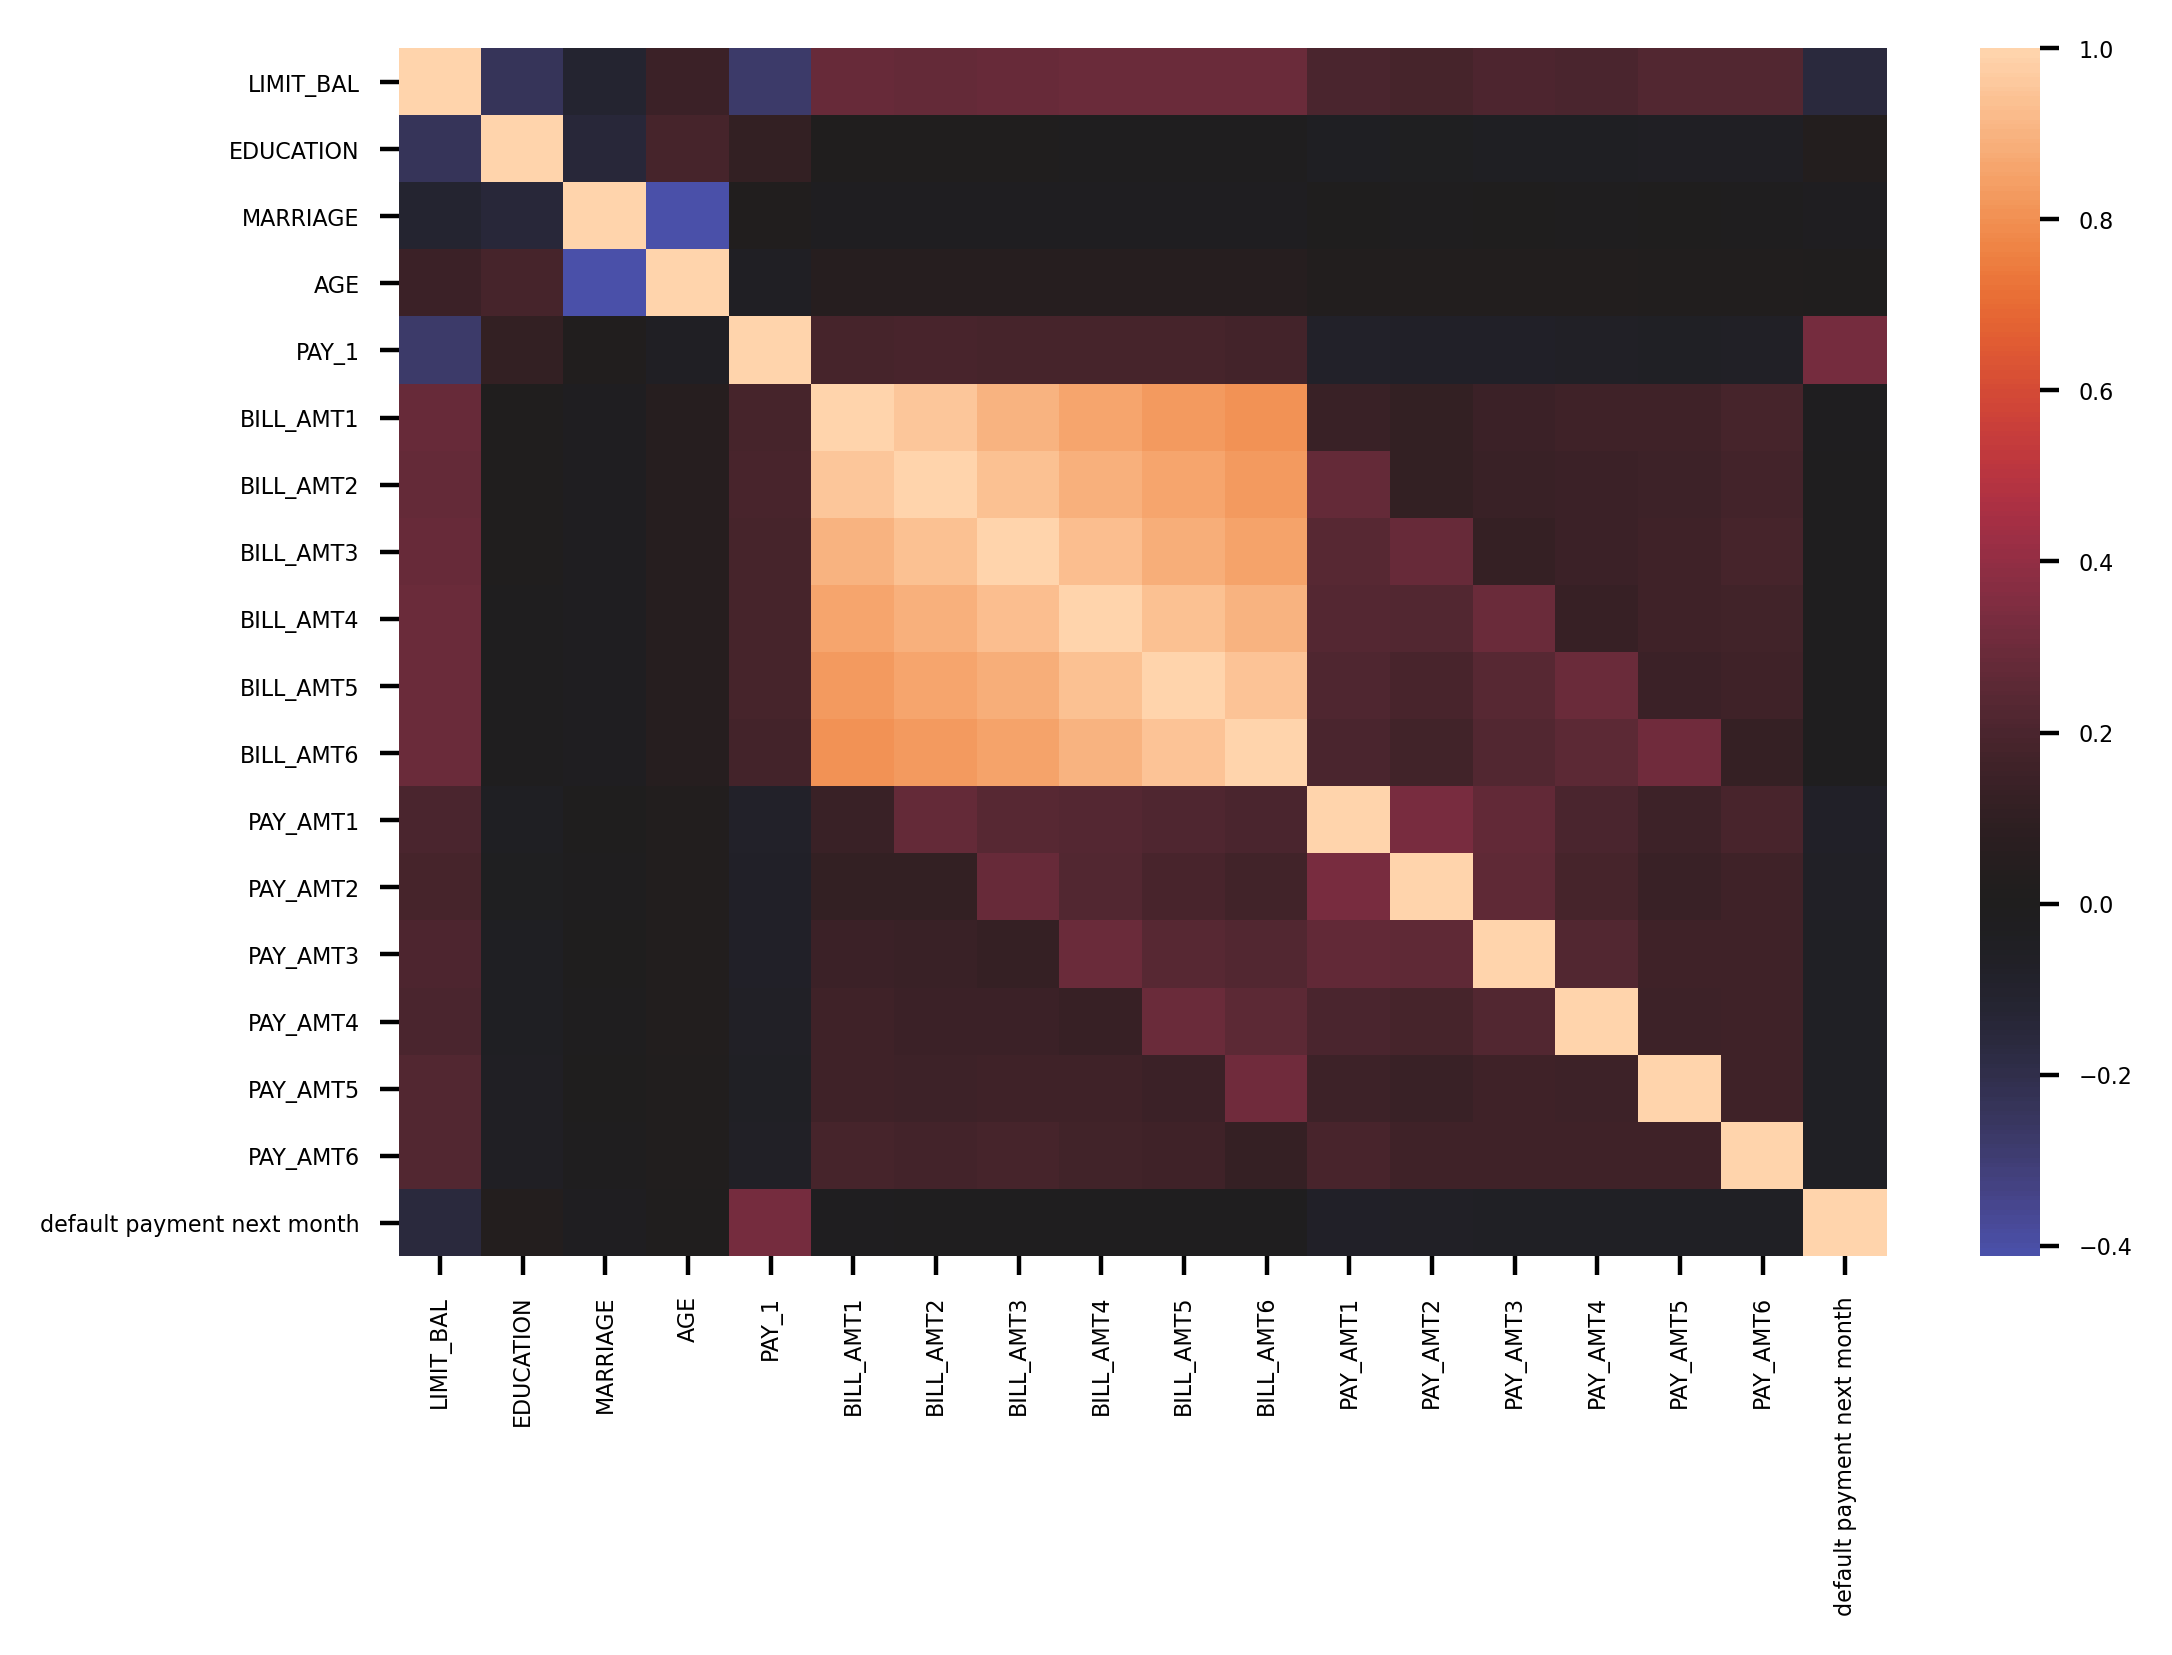

In [5]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

### F-test
* ANOVA F-test(ANOVA stands for "analysis of variance")
* Available in scikit-learn as f_classif
**can be contrasted with the regression F-test**
*  available in scikit-learn as f_regression

# F-test and Univariate Feature Selection

In [6]:
X=df[features_response].iloc[:,:-1].values
y=df[features_response].iloc[:,-1].values
print(X.shape,y.shape)

(26664, 17) (26664,)


In [7]:
from sklearn.feature_selection import f_classif
[f_stat,f_p_value]=f_classif(X,y)

In [8]:
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
                          'F statistic':f_stat,
                          'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [9]:
from sklearn.feature_selection import SelectPercentile

In [10]:
selector = SelectPercentile(f_classif,percentile=20)

In [11]:
selector.fit(X,y)

SelectPercentile(percentile=20)

In [12]:
best_feature_ix=selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [13]:
features=features_response[:-1]
best_features=[features[counter] for counter in range(len(features)) if best_feature_ix[counter]]

In [14]:
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

In [15]:
features=features_response[:-1]

In [16]:
features


['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [17]:
best_features=[features[counter] for counter in range(len(features)) if best_feature_ix[counter]]

In [18]:
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

### Finer Points of the F-test: Equivalence to t-test for Two Classes and Cautions

### Hypotheses and next step

### Visualizing the Relationship between Features and Response

In [19]:
overall_default_rate=df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [20]:
group_by_pay_mean_y=df.groupby('PAY_1')

In [21]:
group_by_pay_mean_y=df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


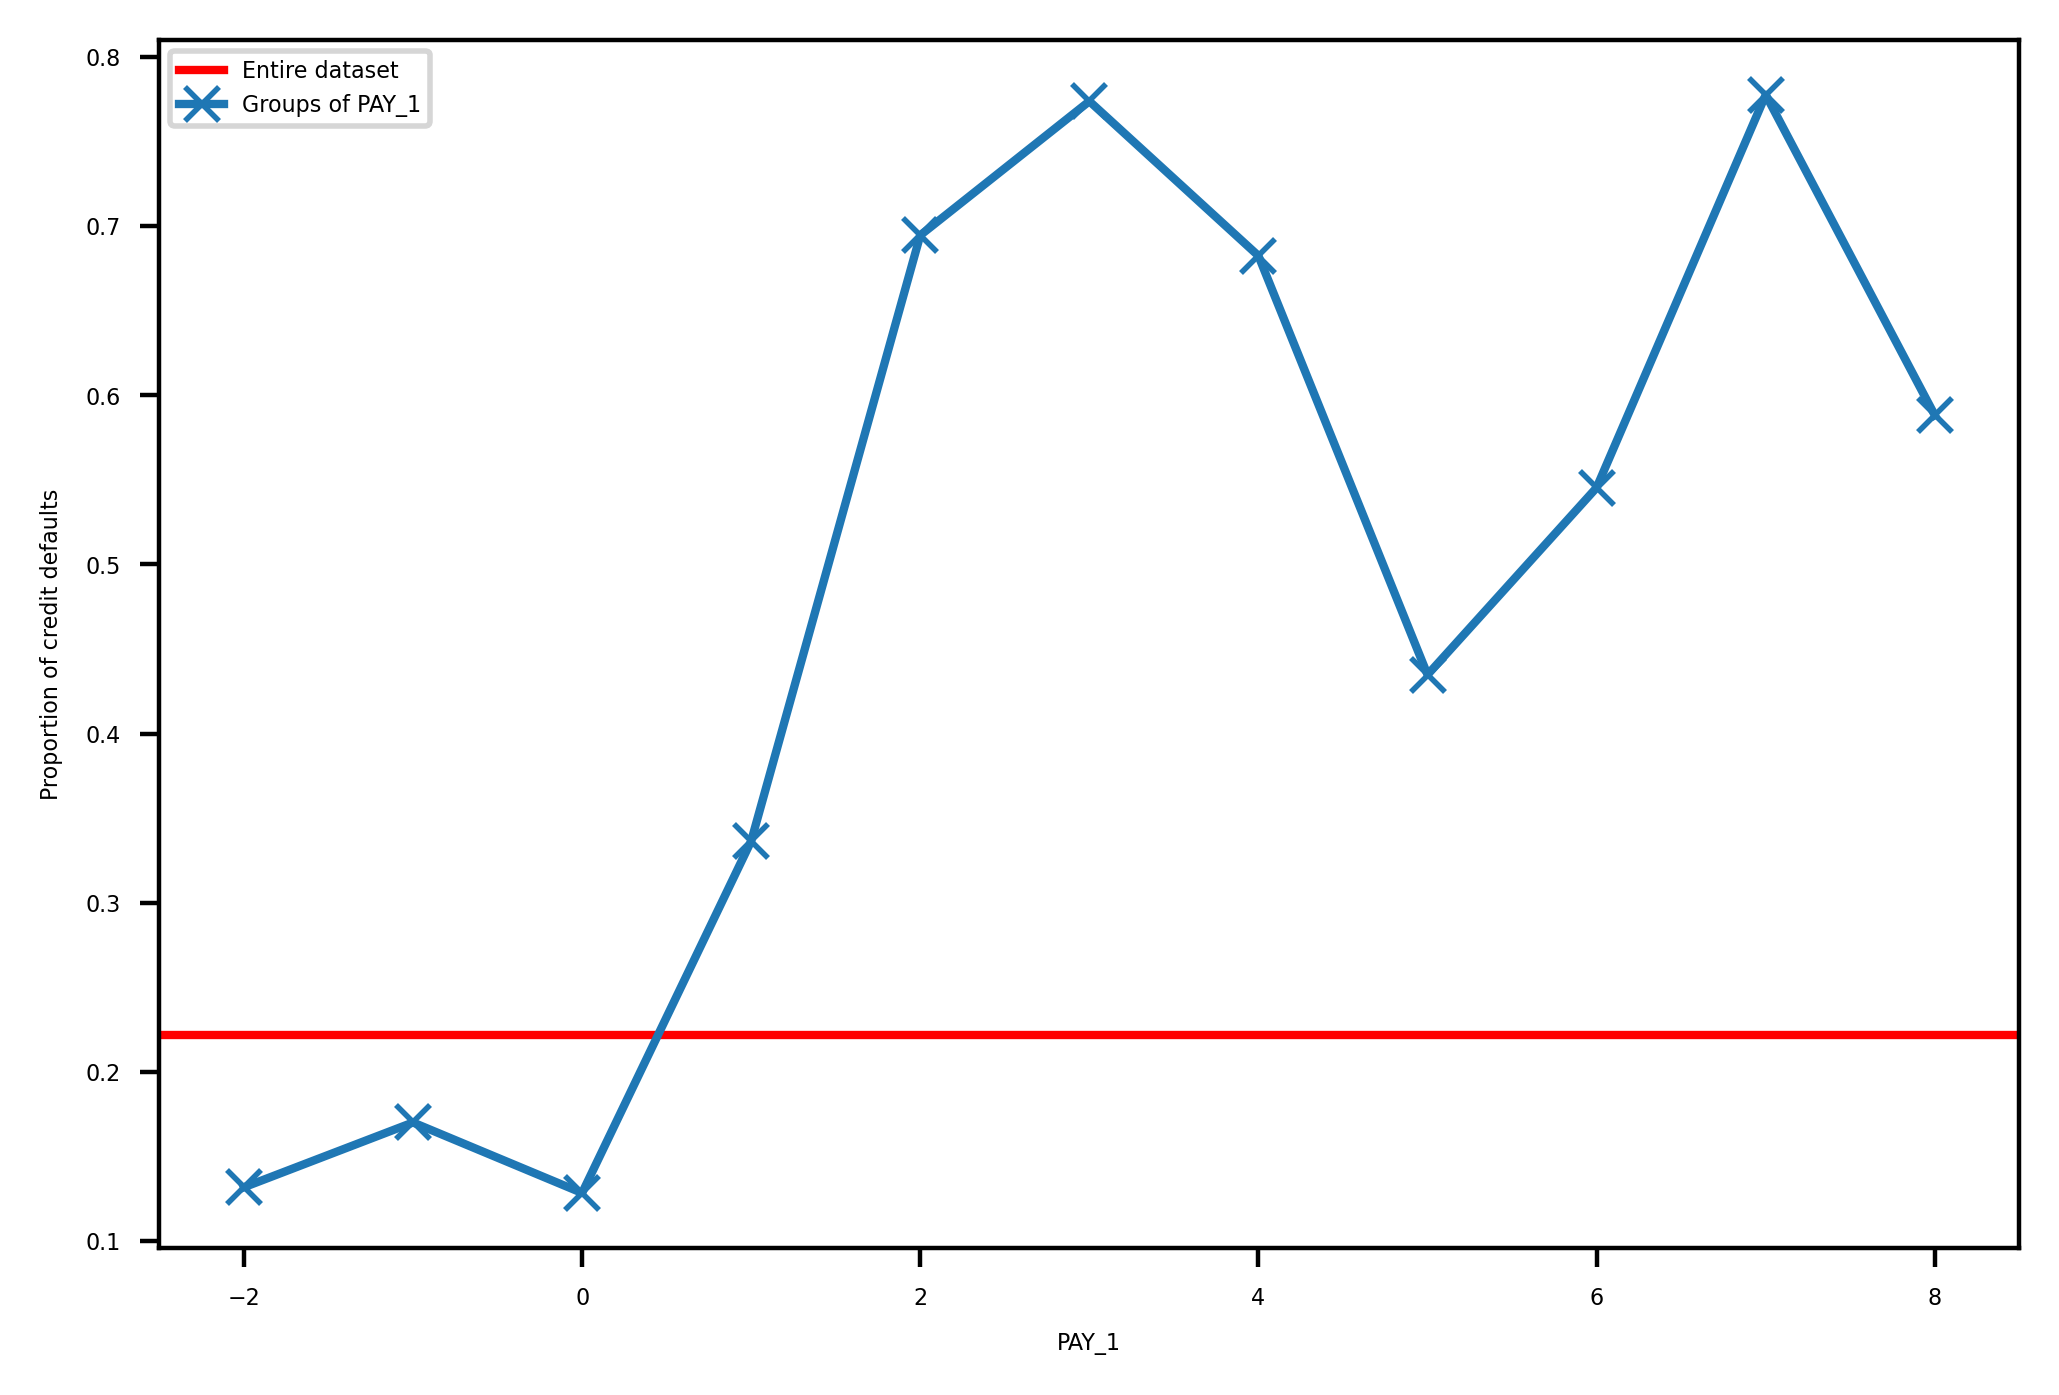

In [22]:
axes=plt.axes()
axes.axhline(overall_default_rate,color='red')
group_by_pay_mean_y.plot(marker='x',legend=False,ax=axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset','Groups of PAY_1'])

In [23]:
pos_mask=y==1
neg_mask=y==0

Text(0.5, 1.0, 'Credit limits by response variable')

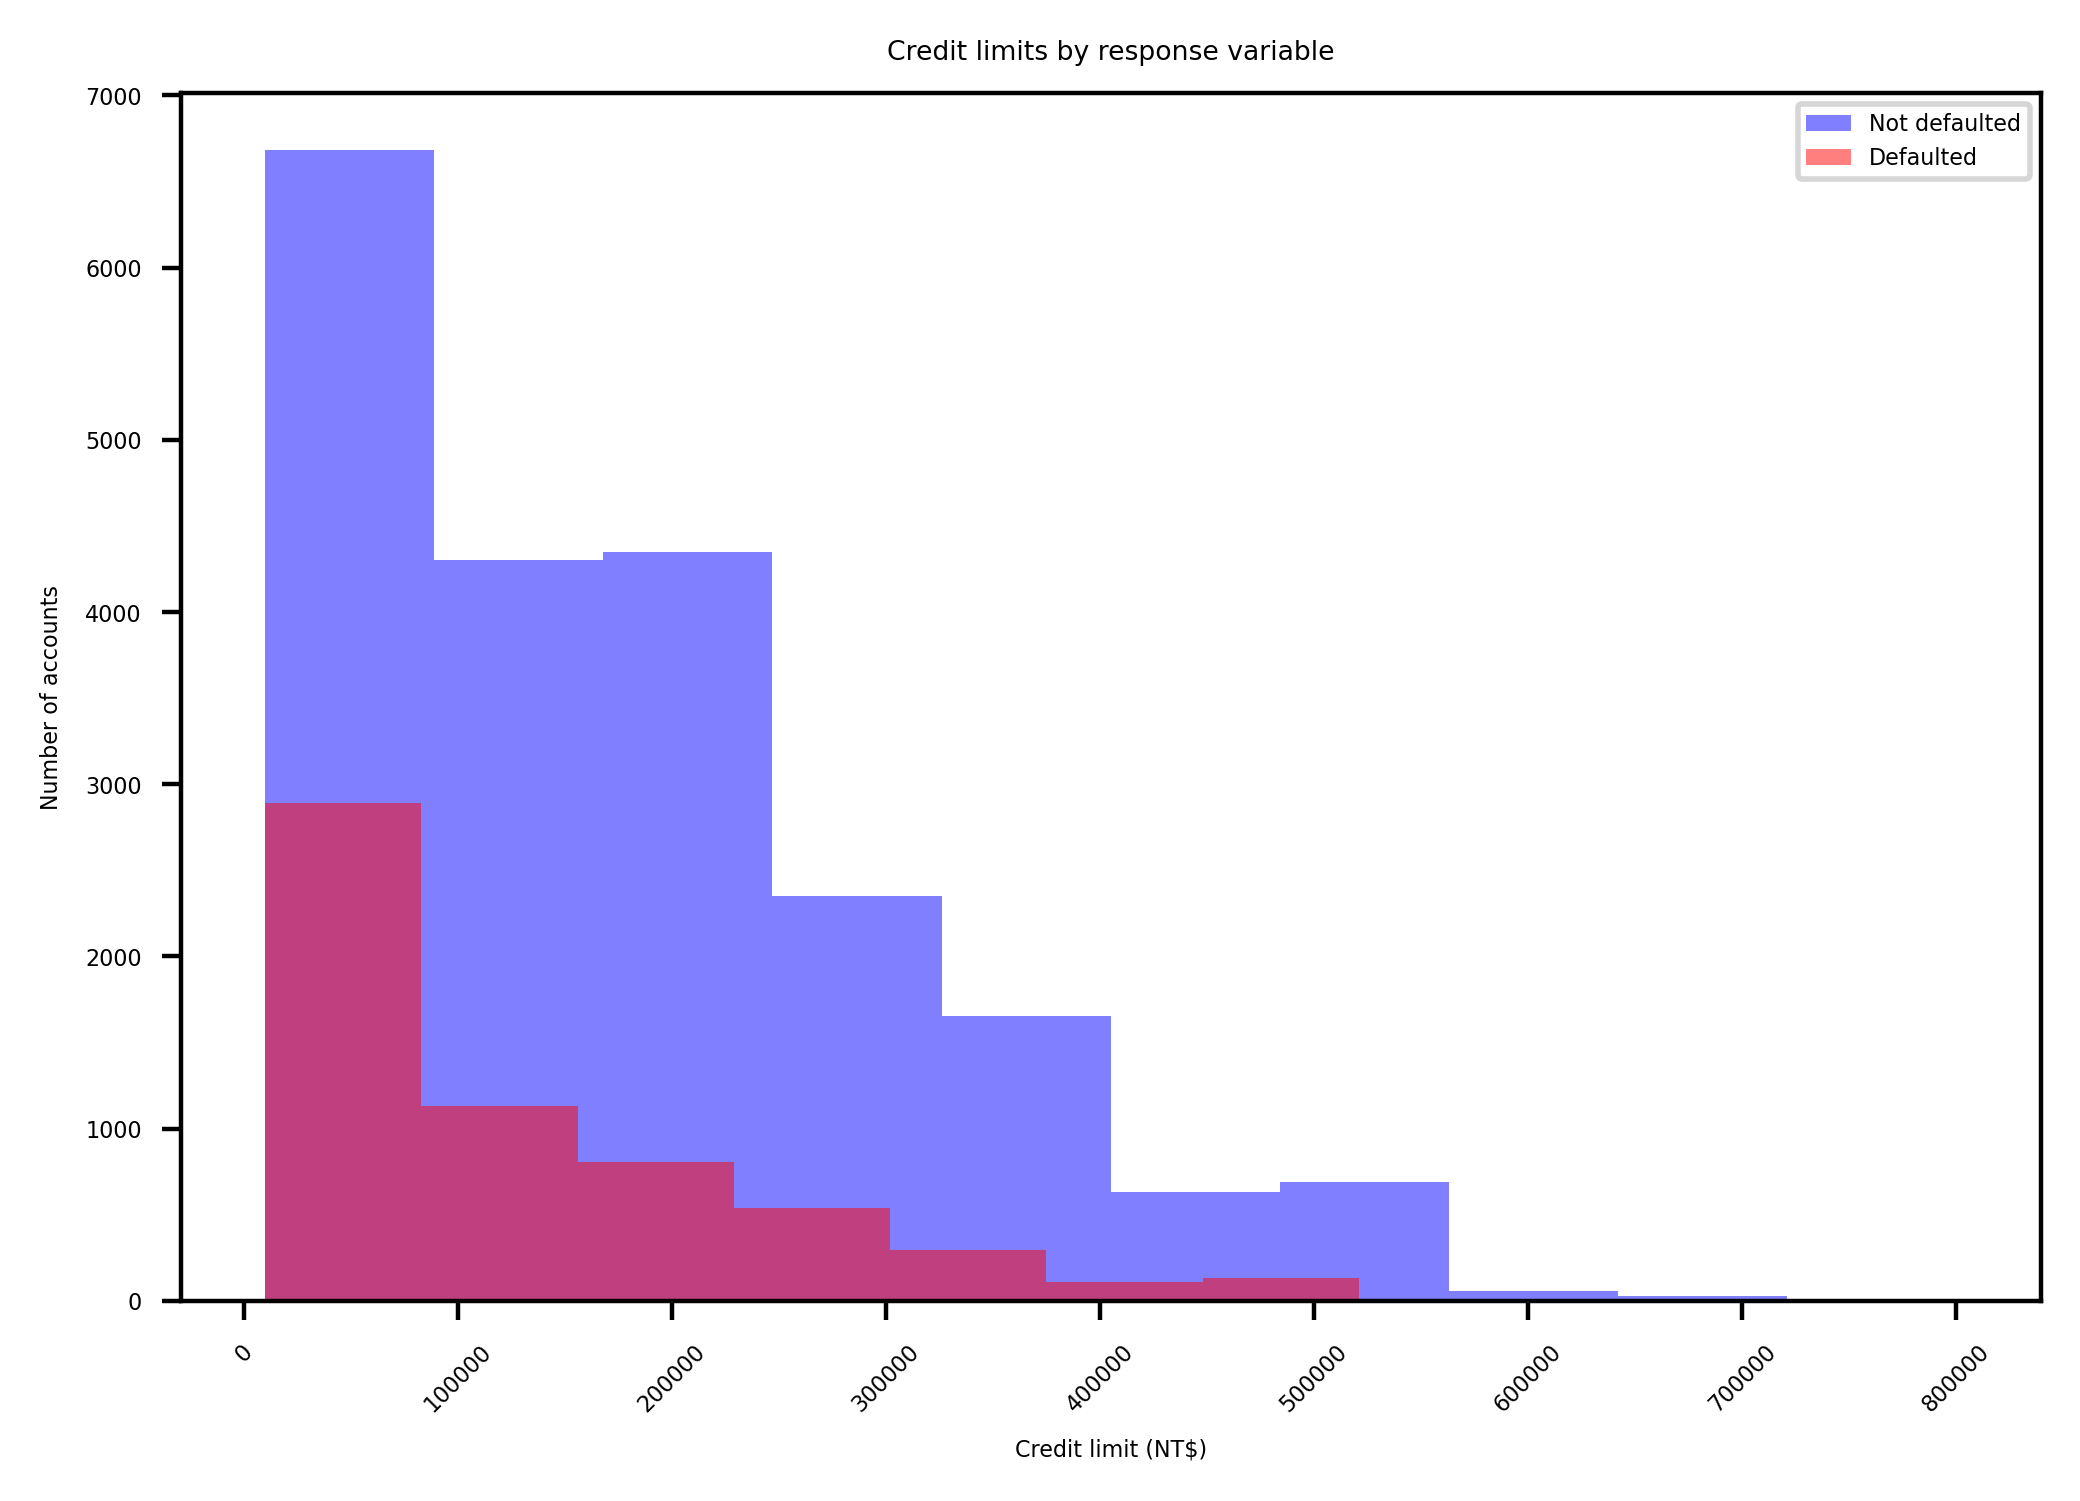

In [24]:
axes=plt.axes()
axes.hist(df.loc[neg_mask,'LIMIT_BAL'],alpha=0.5,color='blue')
axes.hist(df.loc[pos_mask,'LIMIT_BAL'],alpha=0.5,color='red')
axes.tick_params(axis='x',labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted','Defaulted'])
axes.set_title('Credit limits by response variable')

In [25]:
bin_edges=list(range(0,850000,50000))
print(bin_edges[-1])

800000


Text(0.5, 1.0, 'Normalize distributions of credit limits by response variable')

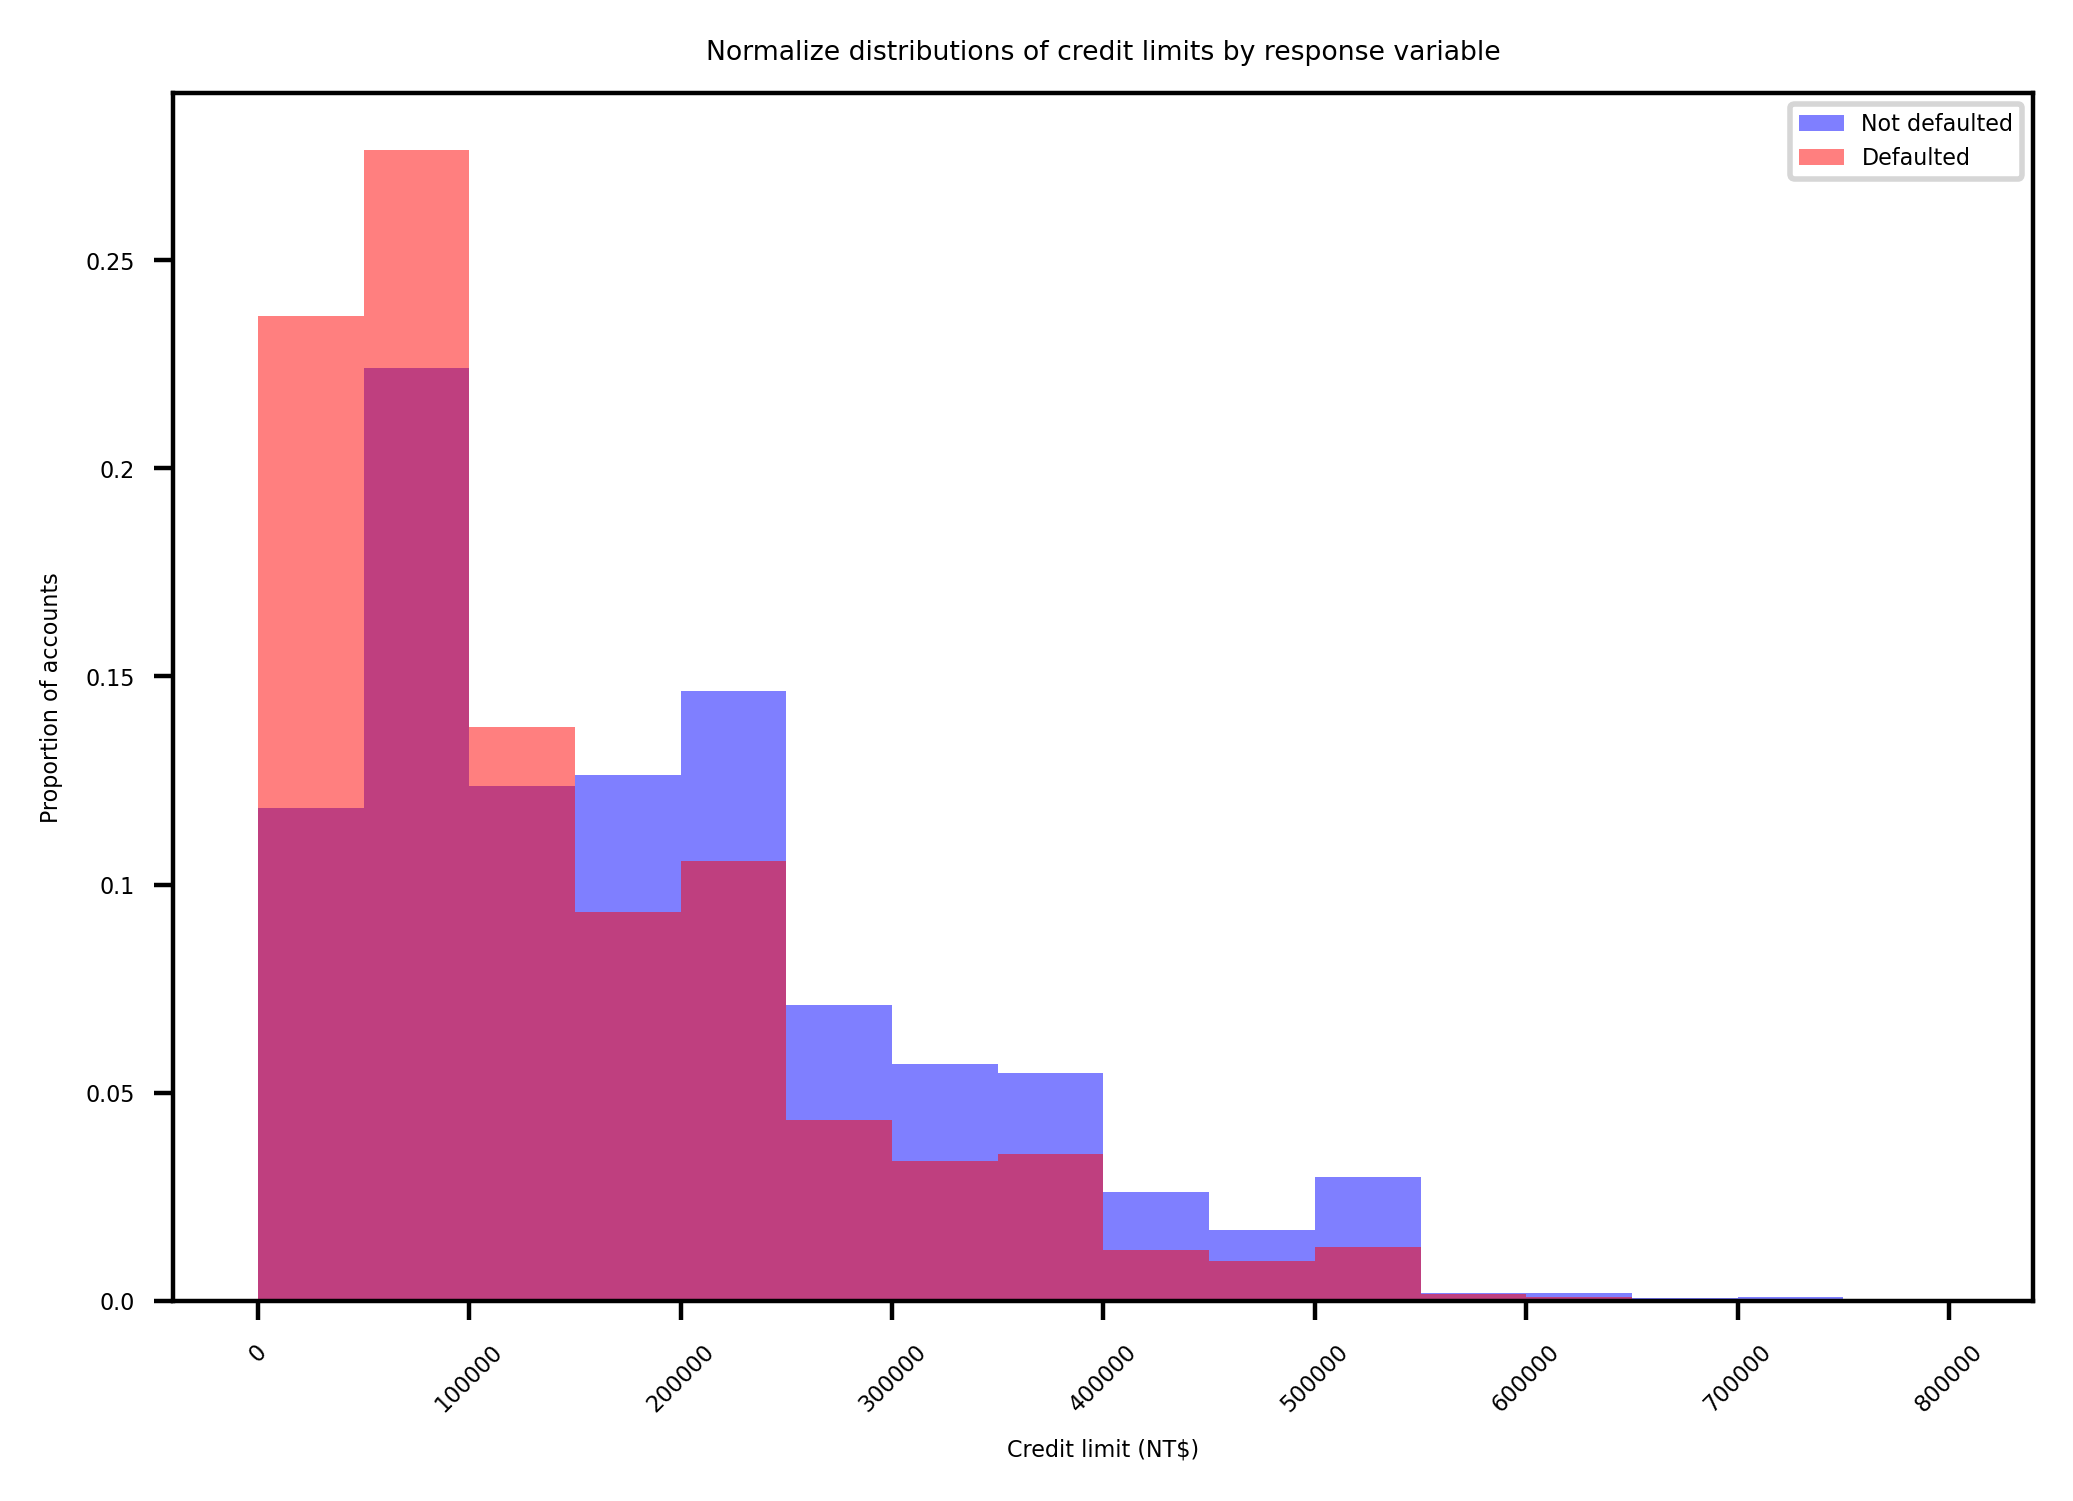

In [26]:
mpl.rcParams['figure.dpi']=400
axes=plt.axes()
axes.hist(df.loc[neg_mask,'LIMIT_BAL'],bins=bin_edges,alpha=0.5,density=True,color='blue')
axes.hist(df.loc[pos_mask,'LIMIT_BAL'],bins=bin_edges,alpha=0.5,density=True,color='red')
axes.tick_params(axis='x',labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks=axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted','Defaulted'])
axes.set_title('Normalize distributions of credit limits by response variable')

### Understanding Logistic Regression with function Syntax in Python and the Sigmoid Function